# Population of United states versus number of government bureaucrats

alternatives:
* https://www.brookings.edu/blog/fixgov/2020/10/07/the-true-size-of-government-is-nearing-a-record-high/
* https://www.pogo.org/analysis/2017/10/contractors-and-true-size-of-government/ which links to
* https://www.volckeralliance.org/sites/default/files/attachments/Issue%20Paper_True%20Size%20of%20Government.pdf

"Regrettably, Congressional Budget Office (CBO) is unaware of any comprehensive information about the size of the federal government’s contracted workforce."   
source: https://federalnewsnetwork.com/management/2015/03/how-many-contractors-does-the-government-have/

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy

In [2]:
numpy.__version__

'1.20.3'

In [3]:
pandas.__version__

'1.3.3'

In [4]:
pandas.set_option('display.max_rows', None)

## population of United States

data on <https://en.wikipedia.org/wiki/Demographic_history_of_the_United_States#Historical_Census_population> comes from
https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html
specifically the CSV linked from that page,
https://www2.census.gov/programs-surveys/decennial/2020/data/apportionment/apportionment.csv

There is annual population values on 
https://www.multpl.com/united-states-population/table/by-year
but that might be interpolated data?

In [5]:
df = pandas.read_csv("apportionment.csv")
df.shape

(684, 10)

In [6]:
# https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
df["Resident Population"]=df["Resident Population"].str.replace(',','')

In [7]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
df["Resident Population"] = pandas.to_numeric(df["Resident Population"])

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['date'] = pandas.to_datetime(df["Year"],format="%Y")

# https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas

In [9]:
df[df["Name"]=="United States"]

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative,date
56,United States,Nation,1910,92228531,21.0,26,NaN,433.0,47.0,"210,328",1910-01-01
113,United States,Nation,1920,106021568,15.0,29.9,NaN,435.0,0.0,"241,864",1920-01-01
170,United States,Nation,1930,123202660,16.2,34.7,NaN,435.0,27.0,"280,675",1930-01-01
227,United States,Nation,1940,132165129,7.3,37.2,NaN,435.0,9.0,"301,164",1940-01-01
284,United States,Nation,1950,151325798,14.5,42.6,NaN,435.0,14.0,"344,587",1950-01-01
341,United States,Nation,1960,179323175,18.5,50.6,NaN,435.0,21.0,"410,481",1960-01-01
398,United States,Nation,1970,203211926,13.3,57.5,NaN,435.0,11.0,"469,088",1970-01-01
455,United States,Nation,1980,226545805,11.5,64.1,NaN,435.0,17.0,"519,235",1980-01-01
512,United States,Nation,1990,248709873,9.8,70.4,NaN,435.0,19.0,"572,466",1990-01-01
569,United States,Nation,2000,281421906,13.2,79.7,NaN,435.0,12.0,"646,952",2000-01-01


In [10]:
df_population_us = df[df["Name"]=="United States"]

In [11]:
df_population_us.index = df_population_us['date']

In [12]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_population_us = df_population_us.drop(['Geography Type','Year','Name','date',
                    'Percent Change in Resident Population',
                     'Resident Population Density', 'Resident Population Density Rank', 
                      'Number of Representatives', 'Change in Number of Representatives',
                      'Average Apportionment Population Per Representative'], axis=1)

In [13]:
df_population_us.head()

,Resident Population
date,
1910-01-01,92228531
1920-01-01,106021568
1930-01-01,123202660
1940-01-01,132165129
1950-01-01,151325798


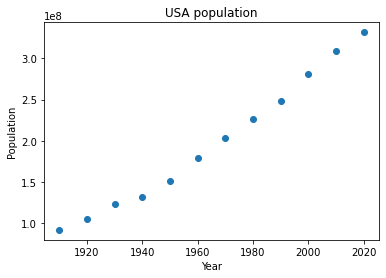

In [14]:
# reduce to a single column with an index for resampling later --
# https://stackoverflow.com/questions/58843656/pandas-interpolation-valueerrorinvalid-fill-method-expecting-pad-ffill-or

# https://stackoverflow.com/questions/55169540/pandas-plot-scatter-plot-with-index
plt.scatter(df_population_us.index, df_population_us['Resident Population'])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("USA population")
plt.show()

## number of government employees 

### Federal

https://www.opm.gov/policy-data-oversight/data-analysis-documentation/federal-employment-reports/historical-tables/executive-branch-civilian-employment-since-1940/

that data, plotted: https://fred.stlouisfed.org/series/CES9091000001

In [15]:
df_fed = pandas.read_csv("CES9091000001_all_gov_since_1940.csv")

In [16]:
df_fed.head()

,DATE,CES9091000001
0,1939-01-01,912.0
1,1939-02-01,925.0
2,1939-03-01,929.0
3,1939-04-01,933.0
4,1939-05-01,941.0


In [17]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.multiply.html
# https://pandas.pydata.org/docs/reference/api/pandas.Series.multiply.html
df_fed['Federal employees'] = df_fed['CES9091000001'].multiply(1000)

# https://stackoverflow.com/questions/33768122/python-pandas-dataframe-how-to-multiply-entire-column-with-a-scalar

In [18]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df_fed['year'] = pandas.to_datetime(df_fed["DATE"],format="%Y-%m-%d")

In [19]:
df_fed.index = df_fed['year']

In [20]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_fed = df_fed.drop(["DATE", 'year', 'CES9091000001'], axis=1)

In [21]:
df_fed.head()

,Federal employees
year,
1939-01-01,912000.0
1939-02-01,925000.0
1939-03-01,929000.0
1939-04-01,933000.0
1939-05-01,941000.0


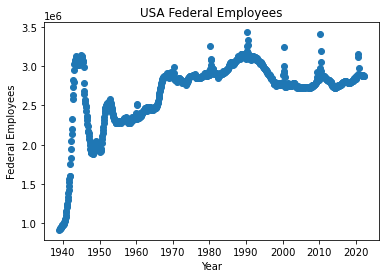

In [22]:
plt.scatter(df_fed.index, df_fed['Federal employees'])
plt.xlabel("Year")
plt.ylabel("Federal Employees")
plt.title("USA Federal Employees")
plt.show()

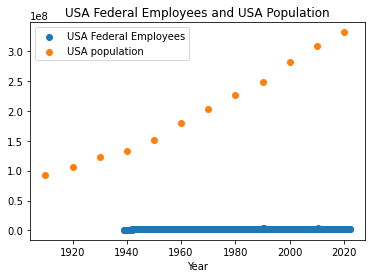

In [23]:

plt.scatter(df_fed.index, df_fed['Federal employees'],label="USA Federal Employees")
plt.scatter(df_population_us.index, df_population_us['Resident Population'],label="USA population")

plt.xlabel("Year")
plt.title("USA Federal Employees and USA Population")
plt.legend()
plt.show()

In [24]:
df_population_us.head()

,Resident Population
date,
1910-01-01,92228531
1920-01-01,106021568
1930-01-01,123202660
1940-01-01,132165129
1950-01-01,151325798


In [25]:
# https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

# https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

# https://stackoverflow.com/questions/53662134/how-can-i-resample-a-pandas-datetimeindex-by-1st-of-month
df_pop_us_upsampled = df_population_us.resample('MS').interpolate(method='time')

In [26]:
df_pop_us_upsampled.head()

,Resident Population
date,
1910-01-01,9.222853e+07
1910-02-01,9.234561e+07
1910-03-01,9.245136e+07
1910-04-01,9.256845e+07
1910-05-01,9.268175e+07


In [27]:
df_pop_us_upsampled.shape

(1321, 1)

In [28]:
df_pop_us_upsampled.head(1)

,Resident Population
date,
1910-01-01,92228531.0


In [29]:
df_pop_us_upsampled.tail(1)

,Resident Population
date,
2020-01-01,331449281.0


In [30]:
df_fed.shape

(999, 1)

In [31]:
df_fed.head(1)

,Federal employees
year,
1939-01-01,912000.0


In [32]:
df_fed.tail(1)

,Federal employees
year,
2022-03-01,2880000.0


In [33]:
df_fed.index[0]==df_pop_us_upsampled.index

array([False, False, False, ..., False, False, False])

In [34]:
# https://stackoverflow.com/questions/52173161/getting-a-list-of-indices-where-pandas-boolean-series-is-true
numpy.nonzero(df_fed.index[0]==df_pop_us_upsampled.index)

(array([348]),)

In [35]:
numpy.nonzero(df_pop_us_upsampled.index[df_pop_us_upsampled.shape[0]-1]==df_fed.index)

(array([972]),)

In [36]:
df_pop_us_upsampled.index[348]

Timestamp('1939-01-01 00:00:00', freq='MS')

In [37]:
df_fed.index[972]

Timestamp('2020-01-01 00:00:00')

In [38]:
df_fed[0:973]

,Federal employees
year,
1939-01-01,912000.0
1939-02-01,925000.0
1939-03-01,929000.0
1939-04-01,933000.0
1939-05-01,941000.0
1939-06-01,948000.0
1939-07-01,954000.0
1939-08-01,962000.0
1939-09-01,970000.0


In [39]:
df_pop_us_upsampled[348:1321]

,Resident Population
date,
1939-01-01,1.312694e+08
1939-02-01,1.313455e+08
1939-03-01,1.314142e+08
1939-04-01,1.314902e+08
1939-05-01,1.315639e+08
1939-06-01,1.316399e+08
1939-07-01,1.317136e+08
1939-08-01,1.317896e+08
1939-09-01,1.318657e+08


In [51]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.divide.html
# https://stackoverflow.com/questions/41726308/divide-two-pandas-series

# https://stackoverflow.com/a/20763459/1164295

df_ratio = pandas.DataFrame(data=df_fed[0:973].values/df_pop_us_upsampled[348:1321].values,
                           columns=['ratio'])
df_ratio.index = df_pop_us_upsampled[348:1321].index

#df_ratio = df_pop_us_upsampled.divide(df_fed.values)

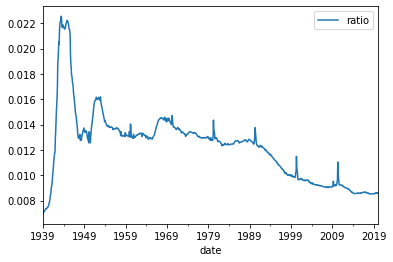

In [54]:
df_ratio.plot();

In [ ]:
# TODO: Add USPS

In [55]:
# TODO: add contractors

In [56]:
# TODO: add state workforce

In [ ]:
# TODO: add teachers